# Model Building
## In this section I will build three different models and see which of these models best perform to predict salaries.

In [55]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [56]:
# Read the data
df = pd.read_csv("eda_data.csv")

In [57]:
# Choose relevant columns
df_models = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'same_state', 'age', 'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len']]

## Create the dummy variables

In [58]:
# Get dummy data
df_dum = pd.get_dummies(df_models)

## Create the train_test split that will be used to train and test the models

In [59]:
# Create the train, test split
# Our dependent variable will be avg_salary, so the X will contains all other variables
X = df_dum.drop('avg_salary', axis = 1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Adding a constant column to X
#### The sm.add_constant(X) function from statsmodels adds a column of 1s to X. This column acts as an intercept (bias) for the linear regression model. The formula for linear regression is generally expressed as:

$$
y = a_0 + a_1 X_1 + a_2 X_2 + a_3 X_3 + a_4 X_4 + \dots
$$


where $$ a_0 $$ is the intercept. The intercept represents the value of y when all predictors $$ x_1, x_2, \ldots, x_n $$ are zero. If a constant column is not added to X, the model is forced to pass through the origin (i.e., y = 0 when all predictors are zero), which may not be appropriate for many real-world datasets. Also, adding a constant column allows the model to better fit the data by "shifting" the regression line up or down to more accurately represent the relationship between the predictors and the response variable. This enhances the model's ability to capture the baseline effect of the predictors, regardless of their values.

In [63]:
X_sm  = X = sm.add_constant(X)
X_sm = X_sm.astype(float)

## Create a linear regression model using the Ordinary Least Squares (OLS) method provided by statsmodels. 
#### The code model = sm.OLS(y, X_sm) creates an OLS model using the vectors y as dependent variables and the DataFrame X_sm (which contains the constant column and independent variables) as independent variables.

In [64]:
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     10.70
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.00e-88
Time:                        19:33:54   Log-Likelihood:                -3385.1
No. Observations:                 742   AIC:                             6986.
Df Residuals:                     634   BIC:                             7484.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                55.4183      6.770      8.186      0.000      42.124      68.712
Rating                                               -0.6567      1.956     -0.336      0.737      -4.498       3.184
num_comp                                              2.5838      0.866      2.983      0.003       0.883       4.285
hourly                                              -39.1432      8.348     -4.689      0.000     -55.537     -22.750
employer_provided                                    32.1311     11.687      2.749      0.006       9.181      55.081
same_state                                            5.5838      2.580      2.164      0.031       0.517      10.650
age                                                   0.0279      0.030      0.927      0.354      -0.031       0.087
python_yn                                             6.4805      2.570      2.522      0.012       1.434      11.527
spark                                                 1.8457      2.993      0.617      0.538      -4.031       7.722
aws                                                   1.7109      2.775      0.616      0.538      -3.739       7.160
excel                                                -1.5722      2.303     -0.683      0.495      -6.095       2.951
desc_len                                           3.207e-06      0.001      0.004      0.997      -0.002       0.002
Size_-1                                              15.7043      9.154      1.716      0.087      -2.271      33.680
Size_1 to 50 employees                                2.3497      6.678      0.352      0.725     -10.764      15.464
Size_10000+ employees                                -0.6763      5.843     -0.116      0.908     -12.150      10.798
Size_1001 to 5000 employees                           3.5711      3.892      0.918      0.359      -4.071      11.213
Size_201 to 500 employees                             4.8423      3.956      1.224      0.221      -2.927      12.611
Size_5001 to 10000 employees                         -5.7958      5.366     -1.080      0.281     -16.333       4.742
Size_501 to 1000 employees                            2.6219      4.002      0.655      0.513      -5.238      10.481
Size_51 to 200 employees                              9.7283      4.471      2.176      0.030       0.948      18.508
Size_Unknown                                         23.0728     14.191      1.626      0.104      -4.794      50.940
Type of ownership_-1                                 15.7043      9.154      1.716      0.087      -2.271      33.680
Type of ownership_College / University               10.4609     16.910      0.619      0.536     -22.745      43.667
Type of ownersh

#### Generally in the context of statistical analysis, a p-value less than 0.05 is considered statistically significant. This means there is a low probability that the observed results are due to chance. Therefore, it is advisable to consider only those results that have a p-value less than 0.05 when evaluating statistical analyses.

## Create a Linear Regression Model

#### I am building a Linear regression model. Then, Cross-validation is being used here to assess the performance of the model and to avoid overfitting. Instead of relying solely on a single train-test split of the data, cross-validation involves splitting the data into multiple subsets (folds), training the model on different combinations of these subsets, and then averaging the performance across these different splits. The `cross_val_score` function calculates the mean absolute error for each fold of the cross-validation process, using the negative mean absolute error scoring metric. By taking the mean of these scores, I obtain an overall estimate of the model's performance that is less sensitive to the specific training-test split of the data.

In [65]:
# Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)
cross_val_mean_score_lm = np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))
print(cross_val_mean_score_lm)

-20.58839315255511


## Create a Lasso Regression Model

#### In this code I am determining the optimal value for the Lasso regression model. A loop iterates over a range of values from 1 to 99 (inclusive) and divides each value by 100 to get alpha values ranging from 0.01 to 0.99. Then , for each alpha value a Lasso regression model is instantiated with the current alpha value. Also, Cross-validation is performed (cross_val_score) to calculate the mean absolute error for the model using 3-fold cross-validation. After the loop, a plot is generated using plt.plot(alpha, error), where alpha represents the x-axis (the range of alpha values) and error represents the y-axis (the mean absolute error). This plot visualizes how the mean absolute error changes as the alpha value varies. Overall, this process helps in identifying the alpha value that minimizes the mean absolute error, thereby selecting the optimal regularization strength for the Lasso regression model.

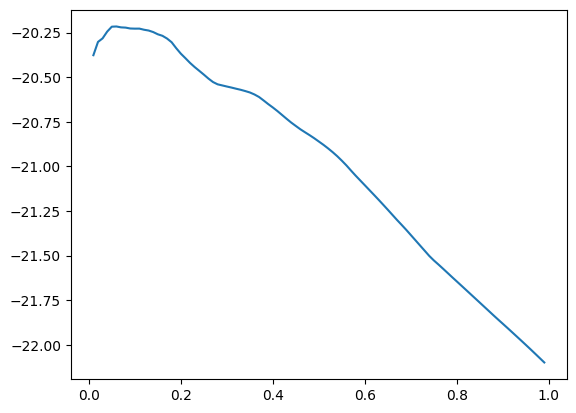

In [68]:
#try different alpha
alpha = []
error = []

for i in range (1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
    
plt.plot(alpha, error)

In [69]:
# The zip() function combines the elements of two or more iterables, returning an iterator of tuples 
# where each tuple contains the corresponding elements from the input iterables
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
5,0.06,-20.215567


#### The lasso regression model is a type of linear regression that incorporates a regularization penalty known as L1 regularization. This penalty helps to reduce the risk of overfitting and to select only the most relevant variables for the model by setting some of the regression coefficients to zero.
#### I am building a Lasso regression model with an alpha value of 0.06 using the `Lasso` function from the scikit-learn library. The alpha parameter controls the strength of the regularization in Lasso regression.

In [70]:
# Lasso Regression Model
lm_lasso = Lasso(alpha = .06)
lm_lasso.fit(X_train, y_train)
cross_val_mean_score_lasso = np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3))
print(cross_val_mean_score_lasso)

-20.215566697010463


## Create a Random Forest Model

In [75]:
rf = RandomForestRegressor()
print(np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error', cv = 3)))

-15.705414508878976


## Perform a Grid Search

#### Grid search is a technique used to find the best hyperparameters for a machine learning model. It involves defining a "grid" of possible combinations of values for the model's hyperparameters and evaluating the model's performance for each combination using cross-validation. At the end of the search, the combination of hyperparameters that yields the best performance according to a specific metric, such as accuracy or error, is selected. This technique is particularly useful when there are multiple hyperparameters to optimize and when it's not clear what values they should take to maximize the model's performance.

In [78]:
# Define the parameters that I will use for the GridSearch
parameters = {'n_estimators': range(10, 100, 10), 'criterion': ('squared_error', 'absolute_error'), 'max_features': ('sqrt', 'log2')}

In [79]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [81]:
print(gs.best_score_)
print(gs.best_estimator_)

-15.665699507768034
RandomForestRegressor(max_features='sqrt', n_estimators=60)


## Make predictions on the test data

In [82]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_lasso.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

## Let's calculate the MAE on every model

#### The last line calculates the mean absolute error between the actual target values (`y_test`) and the ensemble prediction obtained by averaging the predictions from two different models: `tpred_lm` (predictions from a linear regression model) and `tpred_rf` (predictions from a random forest model). The predictions from these two models are averaged before computing the mean absolute error. Calculating the mean absolute error between the predictions of two different models, specifically a linear model and a random forest model, can be useful to assess whether combining the two models improves performance compared to using each model individually. This approach can be part of a technique known as ensemble learning, where predictions from multiple models are combined to achieve a better overall prediction.

In [87]:
print("The MAE for the Linear Regression model is: ", mean_absolute_error(y_test, tpred_lm))
print("The MAE for the Lasso model is: ", mean_absolute_error(y_test, tpred_lml))
print("The MAE for the Random Forest model is: ", mean_absolute_error(y_test, tpred_rf))
print("The MAE beetwen the Random Forest model and the Linear Regression model is: ",mean_absolute_error(y_test, (tpred_lm + tpred_rf)/2))

The MAE for the Linear Regression model is:  21.33244913374731
The MAE for the Lasso model is:  20.753605582121196
The MAE for the Random Forest model is:  12.347203579418343
The MAE beetwen the Random Forest model and the Linear Regression model is:  15.449954191444691


### Generally when comparing different prediction models, preference is given to those with the lowest Mean Absolute Error (MAE) value. So, based on the provided values, the Random Forest model has the lowest MAE, indicating that it tends to make more accurate predictions compared to the linear regression and Lasso models. 